In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from extract_load import multiple_csv_to_dict_df
from preprocessing import combine_dataframes

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

C:\Users\jvaug_000\Anaconda3\envs\group3nlp\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
path = "./data"
dict_df = multiple_csv_to_dict_df(path)

In [3]:
df = combine_dataframes(dict_df)
    

C:\Users\jvaug_000\Desktop\kcmlaig\group3_nlp\preprocessing.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(dict_df.values()).reset_index()


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63634 entries, 0 to 63633
Data columns (total 13 columns):
index                                                       63634 non-null int64
Average Medicare Allowed Amount                             63634 non-null float64
Average Medicare Payment Amount                             63634 non-null float64
Average Medicare Standardized Payment Amount                38342 non-null float64
Average Submitted Charge Amount                             63634 non-null float64
HCPCS Code                                                  63634 non-null object
HCPCS Description                                           63634 non-null object
HCPCS Drug Indicator                                        63634 non-null object
Number of Distinct Medicare Beneficiary/Per Day Services    63634 non-null int64
Number of Providers                                         63634 non-null int64
Number of Services                                          63634 non-

In [5]:
X = df['HCPCS Description']
y = df['Average Submitted Charge Amount']

def continous_to_categorical(x):
  if x <= 1600:
    return 'low'
  elif 1600 > x <= 4000:
    return 'medium'
  return 'high'


#y = y.apply(continous_to_categorical)


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# create count vectorizer object
count_vectorizer = CountVectorizer(stop_words="english")

# Transform training data
count_train = count_vectorizer.fit_transform(X_train)

# Transform test data
count_test = count_vectorizer.transform(X_test)

# Print first ten features of the trained count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

y


['000', '01', '0157', '10', '100', '1000', '100mg', '103', '10mev', '10mg']


0           60.24
1           14.42
2           14.17
3          762.94
4          885.15
5          532.34
6          513.14
7          642.41
8          437.08
9        12741.83
10       15066.43
11         607.21
12        1065.95
13        1728.82
14          90.42
15         161.67
16         697.97
17         617.81
18          58.22
19         487.16
20           4.36
21           4.14
22          94.44
23          66.01
24         127.41
25          81.42
26          26.67
27          20.74
28        1306.28
29         156.97
           ...   
63604       28.20
63605       90.12
63606      132.97
63607      141.38
63608        0.74
63609       16.43
63610        8.81
63611       35.10
63612        5.48
63613        1.83
63614       26.34
63615        3.32
63616        7.51
63617        4.86
63618       11.03
63619        1.62
63620       49.20
63621        2.24
63622       22.96
63623       19.25
63624     3348.09
63625     3847.27
63626      251.01
63627      297.80
63628     

In [6]:
import math
y=y.apply(math.log)



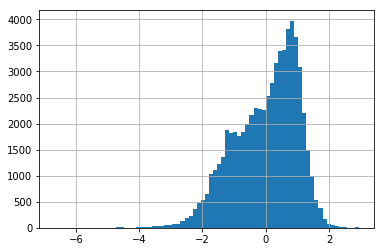

In [7]:
y = (y - y.mean())/y.std()

y.hist(bins=75)

In [8]:
# Train Naive Bayes model

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate model
nb_classifier = MultinomialNB()

# Fit model
nb_classifier.fit(count_train, y_train)

#pred
pred = nb_classifier.predict(count_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

ValueError: Unknown label type: (array([2568.51,  599.53,  436.04, ...,    5.03, 1057.7 , 1564.28]),)